In [2]:
# imports

import yaml
import pretty_midi

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

import IPython.display


## Note

This notebook was used for the initial training and generation process of the project. For the latter half, we moved on to work in google colab with the following notebook:

Colab notebook: https://colab.research.google.com/github/asigalov61/SuperPiano/blob/master/Super_Piano_3.ipynb

## Preprocess

Convert MIDI files to .pickle. These will be used as input to our models. Each composor saved by themselves and as a combined set.

In [1]:
%run MusicTransformer/preprocess ./Dataset/maestro-v2.0.0/ ./Dataset/MaestroTraining

./Dataset/MaestroTraining


 [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_08_Track08_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_10_Track10_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_02_Track02_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_05_R1_2004_01_ORIG_MID--AUDIO_05_R1_2004_03_Track03_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_05_R1_2004_02-03_ORIG_MID--AUDIO_05_R1_2004_06_Track06_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_02_Track02_wav.midi] [./Dataset/maestro-v2.0.0/2004\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_M

## Training


We now train our 4 networks architectures on our datasets. Changes are made directly to YAML files since they are "hard" to edit.

In [9]:
%run MusicTransformer/train.py -c ./MusicTransformer/config/base.yml ./MusicTransformer/config/train.yml -m ./Models

./Dataset/LakhTraining
<class Data has "16937" files>


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 8.00 GiB total capacity; 7.24 GiB already allocated; 0 bytes free; 7.37 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Generation

Generate music from trained models

In [24]:
%run MusicTransformer/generate.py -c ./MusicTransformer/config/base.yml ./MusicTransformer/config/train.yml ./MusicTransformer/config/generate.yml -m ./Models/CleanModels

ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/apply:torch.device'
  in "<unicode string>", line 4, column 9:
    device: !!python/object/apply:torch.device
            ^

### Plot MIDI File



In [30]:
# Code from https://notebook.community/craffel/pretty-midi/Tutorial

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

Text(0.5, 1.0, 'Bach 847 (shortened)')

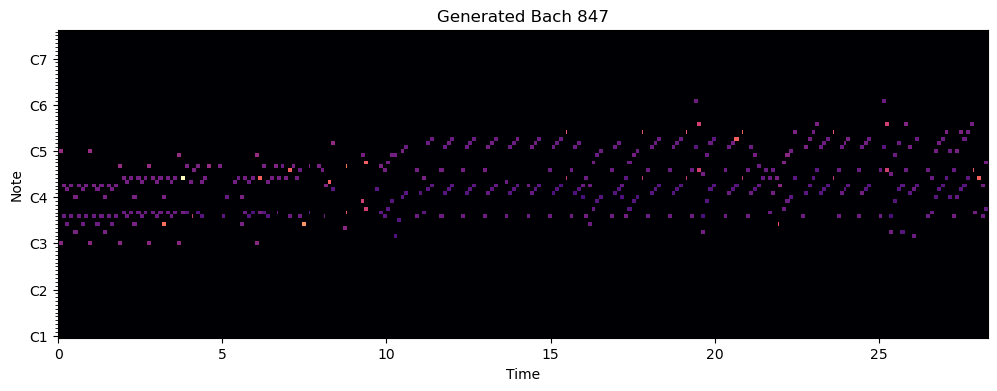

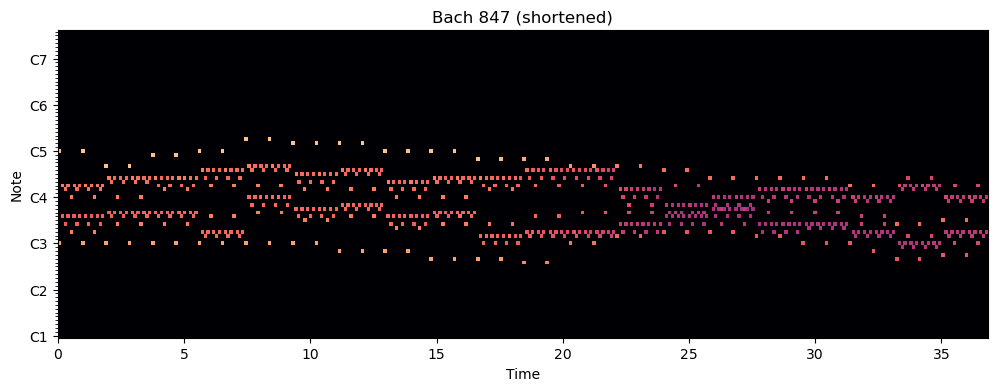

In [61]:
# Basic plot comparison of best bach 847 generation

pm = pretty_midi.PrettyMIDI('Generated/bach_847_colab_2048.mid')

test = pm.get_piano_roll(100)[24:84]



plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 104)
plt.title("Generated Bach 847")

pm_clean = pretty_midi.PrettyMIDI('Dataset/ClassicalMusicMIDI/bach/bach_847_shortened.mid')


plt.figure(figsize=(12, 4))
plot_piano_roll(pm_clean, 24, 104)
plt.title("Bach 847 (shortened)")

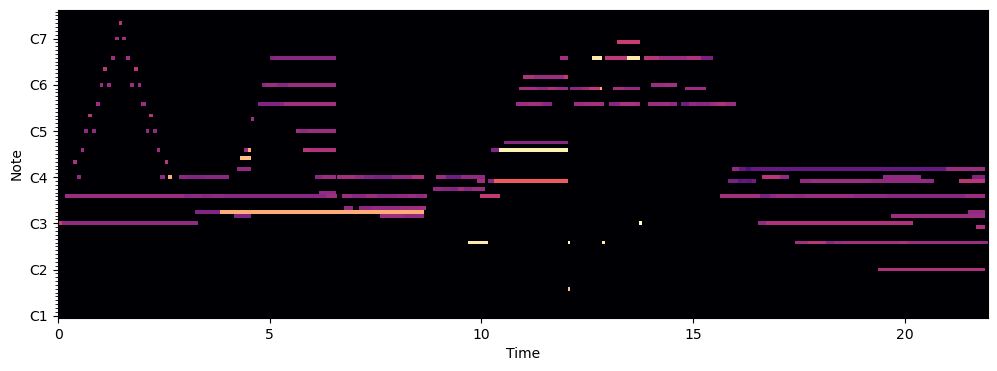

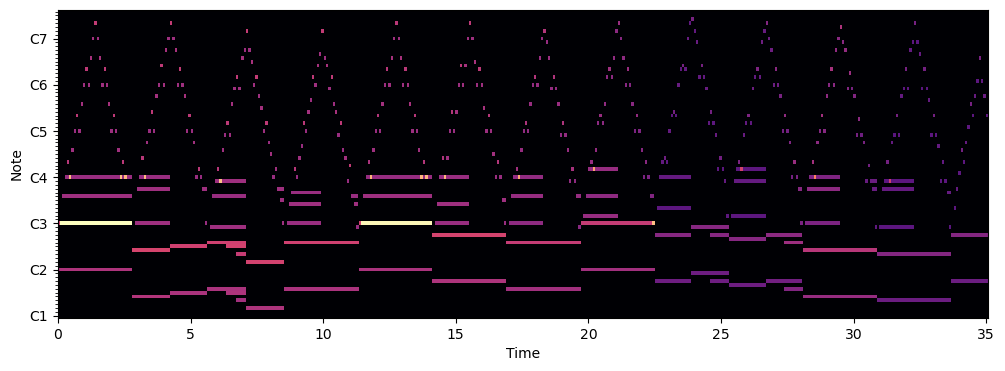

In [62]:
# Basic plot comparison of best Chopin Etudes Op 10 generation

pm = pretty_midi.PrettyMIDI('Survey/all/chpn_op10_e01_P_2048seq.mid')

test = pm.get_piano_roll(100)[24:84]


plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 104)

pm_clean = pretty_midi.PrettyMIDI('Dataset/ClassicalMusicMIDI/chopin/chpn_op10_e1_shortened.mid')

plt.figure(figsize=(12, 4))
plot_piano_roll(pm_clean, 24, 104)